Лабораторна робота №3 ФІТ 4-6 Піць А. В.

In [2]:
#1. Імпорт бібліотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#2. Завантаження даних
df = pd.read_csv("data.csv")
print("Розмірність:", df.shape)
df.head()


Розмірність: (2338, 14)


,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang,Cured
0,2.4,18.7,18.4,27.9,7.9,9.6,18.3,13.2,2.5,26.0,10.5,26.2,12.5,0
1,2.1,6.0,15.0,13.3,15.6,13.1,11.0,5.0,7.2,26.0,1.5,13.3,6.2,0
2,17.2,13.9,23.8,6.8,10.7,15.8,19.4,2.7,15.4,21.2,11.1,16.6,11.4,1
3,8.4,9.7,6.8,26.9,4.6,29.1,14.6,19.7,18.0,20.8,13.6,13.9,8.1,1
4,22.1,10.8,16.4,10.5,22.0,23.4,2.6,18.2,23.8,11.3,5.5,16.8,16.2,0


Пропущені значення:
Phoenix Feather    0
Unicorn Horn       0
Dragon's Blood     0
Mermaid Tears      0
Fairy Dust         0
Goblin Toes        0
Witch's Brew       0
Griffin Claw       0
Troll Hair         0
Kraken Ink         0
Minotaur Horn      0
Basilisk Scale     0
Chimera Fang       0
Cured              0
dtype: int64

Унікальні значення в цільовій змінній:
Cured
0    1177
1    1161
Name: count, dtype: int64


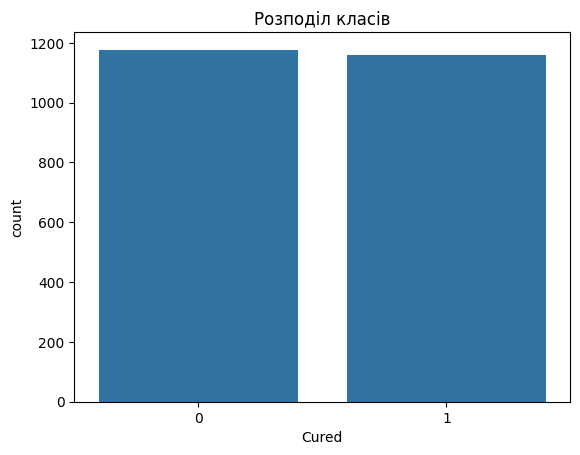

In [3]:
#3. Аналіз і підготовка даних
print("Пропущені значення:")
print(df.isnull().sum())

print("\nУнікальні значення в цільовій змінній:")
print(df['Cured'].value_counts())

sns.countplot(data=df, x='Cured')
plt.title("Розподіл класів")
plt.show()


In [5]:
#4. Розділення даних і масштабування
X = df.drop("Cured", axis=1)
y = df["Cured"]

# Поділ на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабування
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
#5. Побудова тензорів
X_train_tensor = tf.convert_to_tensor(X_train_scaled, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test_scaled, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test.values, dtype=tf.float32)


In [8]:
#6. Побудова нейронної мережі
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_tensor, y_train_tensor, epochs=20, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5201 - loss: 0.6900 - val_accuracy: 0.6444 - val_loss: 0.6428
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6835 - loss: 0.6312 - val_accuracy: 0.7781 - val_loss: 0.5762
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7917 - loss: 0.5572 - val_accuracy: 0.8422 - val_loss: 0.4932
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8476 - loss: 0.4719 - val_accuracy: 0.8610 - val_loss: 0.4059
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8702 - loss: 0.3790 - val_accuracy: 0.8904 - val_loss: 0.3415
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8896 - loss: 0.3138 - val_accuracy: 0.8984 - val_loss: 0.2871
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9044 - loss: 0.2696 - val_accuracy: 0.9251 - val_loss: 0.2521
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9238 - loss: 0.2287 - val_accuracy: 0.9278 - val_loss

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9548 - loss: 0.1439 
Нейронна мережа — Точність: 0.9551, Функція втрат: 0.1458


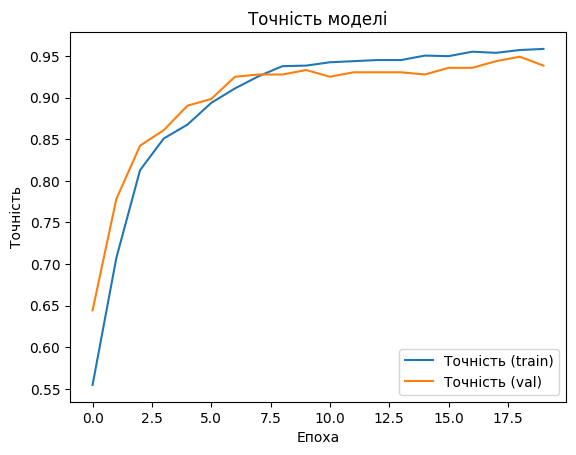

In [9]:
#7. Оцінка моделі
loss, accuracy = model.evaluate(X_test_tensor, y_test_tensor)
print(f"Нейронна мережа — Точність: {accuracy:.4f}, Функція втрат: {loss:.4f}")

# Графік
plt.plot(history.history['accuracy'], label='Точність (train)')
plt.plot(history.history['val_accuracy'], label='Точність (val)')
plt.title("Точність моделі")
plt.xlabel("Епоха")
plt.ylabel("Точність")
plt.legend()
plt.show()


In [10]:
#8. Логістична регресія
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)


In [11]:
#9. Метрики логістичної регресії
accuracy_lr = accuracy_score(y_test, y_pred)
print(f"Логістична регресія — Точність: {accuracy_lr:.4f}")


Логістична регресія — Точність: 0.8932


In [12]:
#10. Матриця плутанини, звіт
print("Матриця плутанини:")
print(confusion_matrix(y_test, y_pred))

print("\nКласифікаційний звіт:")
print(classification_report(y_test, y_pred))


Матриця плутанини:
[[207  24]
 [ 26 211]]

Класифікаційний звіт:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       231
           1       0.90      0.89      0.89       237

    accuracy                           0.89       468
   macro avg       0.89      0.89      0.89       468
weighted avg       0.89      0.89      0.89       468



In [13]:
#11. Порівняння результатів
print(f"Точність нейронної мережі: {accuracy:.4f}")
print(f"Точність логістичної регресії: {accuracy_lr:.4f}")


Точність нейронної мережі: 0.9551
Точність логістичної регресії: 0.8932


Висновки:
У ході роботи було проаналізовано дані та підготовлено їх для моделювання. Створено та навчено нейронну мережу, а також логістичну регресію для порівняння результатів. Обидві моделі показали хорошу точність, проте нейронна мережа працювала трохи краще. Отже, моделі можуть бути використані для прогнозування, чи буде принцеса вилікувана на основі вхідних даних.